<a href="https://colab.research.google.com/github/kishore862022/Diabetes-Analysis-and-KNN-ASS-2/blob/main/Diabetes_Analysis_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import / Data Cleaning
Importing packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import of dataset + Data Cleaning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace= True)
to_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
to_nan.append(['BMI', 'DPF', 'Age'])
for i in range(len(to_nan)):
    df[to_nan[i]] = df[to_nan[i]].replace(0, np.nan)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.0,35.0,NaN,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,NaN,NaN,NaN,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.0,17.0,NaN,25.6,0.294,28,0
7,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
8,2,83.0,65.0,28.0,66.0,36.8,0.629,24,0
9,2,89.0,90.0,30.0,NaN,33.5,0.292,42,0


Data Cleaning:  replaced empty cells with a value of 0 with NaN (Not a Number). Only the columns "Pregnancies" and "Outcome" were left untouched, as a value of 0 can be valid in these cases. This enables us to handle the data more effectively

In [ ]:
df_true = df[(df.Outcome>0)]
df_true.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,684.0,4.732456,3.746358,0.000,1.000,4.000,7.000,17.00
Glucose,678.0,142.821534,29.252111,80.000,120.000,141.000,167.000,199.00
BloodPressure,645.0,75.469767,12.040219,30.000,68.000,75.000,82.000,114.00
SkinThickness,467.0,33.149893,10.259457,7.000,27.000,32.000,39.000,99.00
Insulin,337.0,200.729970,119.845367,14.000,127.000,167.000,231.000,600.00
BMI,681.0,35.476065,6.782651,20.100,30.900,34.300,38.700,67.10
DPF,684.0,0.540681,0.363689,0.088,0.261,0.434,0.727,2.42
Age,684.0,36.956140,10.924115,21.000,28.000,36.000,44.000,70.00
Outcome,684.0,1.000000,0.000000,1.000,1.000,1.000,1.000,1.00


In [ ]:
df_false = df[(df.Outcome<1)]
df_false.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1316.0,3.168693,2.913526,0.000,1.00000,2.000,5.000,13.000
Glucose,1309.0,111.177998,25.297459,44.000,93.00000,107.000,126.000,197.000
BloodPressure,1265.0,70.840316,12.029952,24.000,62.00000,70.000,78.000,122.000
SkinThickness,960.0,27.488542,10.576691,7.000,19.00000,27.000,34.000,110.000
Insulin,707.0,131.346535,99.500524,15.000,66.00000,105.000,168.000,744.000
BMI,1291.0,31.159411,7.030065,18.200,25.90000,30.400,35.500,80.600
DPF,1316.0,0.434676,0.294268,0.078,0.23475,0.342,0.571,2.329
Age,1316.0,31.081307,11.721103,21.000,23.00000,26.000,36.250,81.000
Outcome,1316.0,0.000000,0.000000,0.000,0.00000,0.000,0.000,0.000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,1987.0,121.975340,30.632883,44.000,99.000,117.000,141.000,199.00
BloodPressure,1910.0,72.403665,12.227968,24.000,64.000,72.000,80.000,122.00
SkinThickness,1427.0,29.341275,10.802278,7.000,22.000,29.000,36.000,110.00
Insulin,1044.0,153.743295,111.273639,14.000,76.750,126.000,190.000,744.00
BMI,1972.0,32.650101,7.241027,18.200,27.500,32.400,36.800,80.60
DPF,2000.0,0.470930,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
del df['Insulin']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        1987 non-null   float64
 2   BloodPressure  1910 non-null   float64
 3   SkinThickness  1427 non-null   float64
 4   BMI            1972 non-null   float64
 5   DPF            2000 non-null   float64
 6   Age            2000 non-null   int64  
 7   Outcome        2000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 125.1 KB


              BMI   Outcome
BMI      1.000000  0.283522
Outcome  0.283522  1.000000



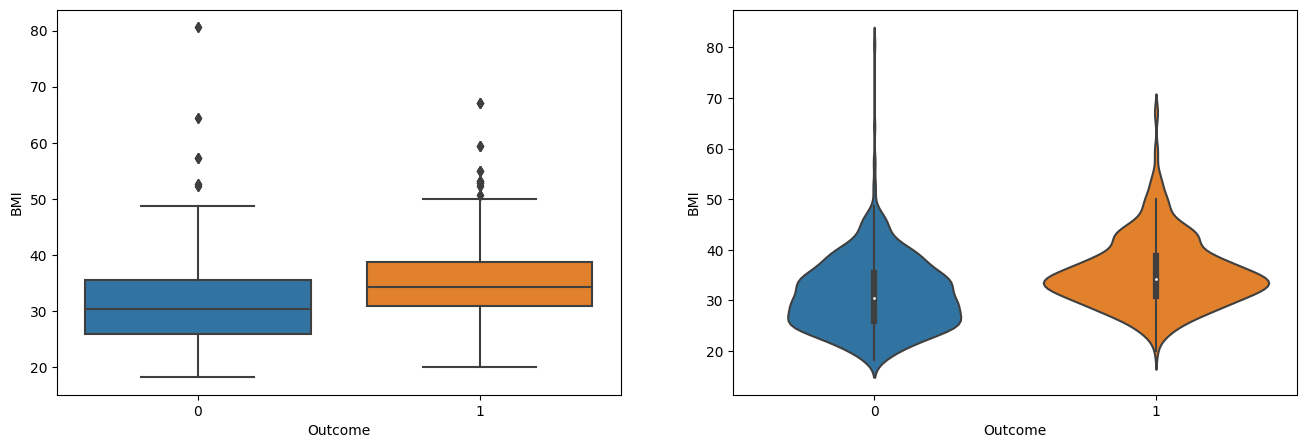

Median negativ: 26.0
Median positiv: 36.0


In [ ]:
bmi_to_out = df[['BMI','Outcome']]
print(bmi_to_out.corr())
print("")

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False, sharex=False)

sns.boxplot(x= df['Outcome'], y = df['BMI'], ax= axes[0])
sns.violinplot(x= df['Outcome'], y = df['BMI'], ax= axes[1])
plt.show()
print('Median negativ:', df_false.Age.median())
print('Median positiv:', df_true.Age.median())

<Axes: xlabel='BMI', ylabel='Outcome'>

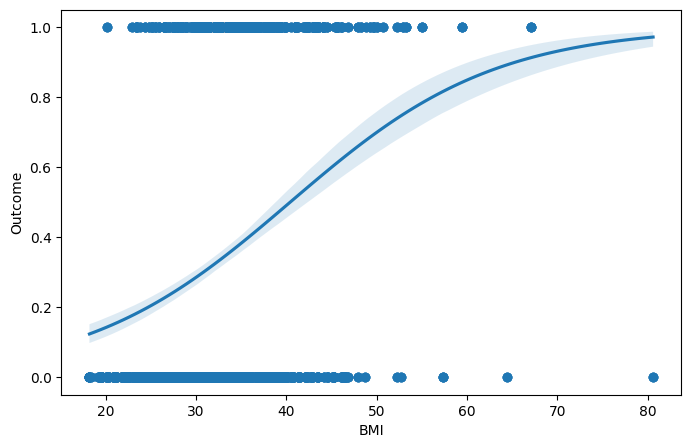

In [ ]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(bmi_to_out['BMI'], bmi_to_out['Outcome'])
sns.regplot(data = df, x = df['BMI'], y = df['Outcome'], logistic = True)

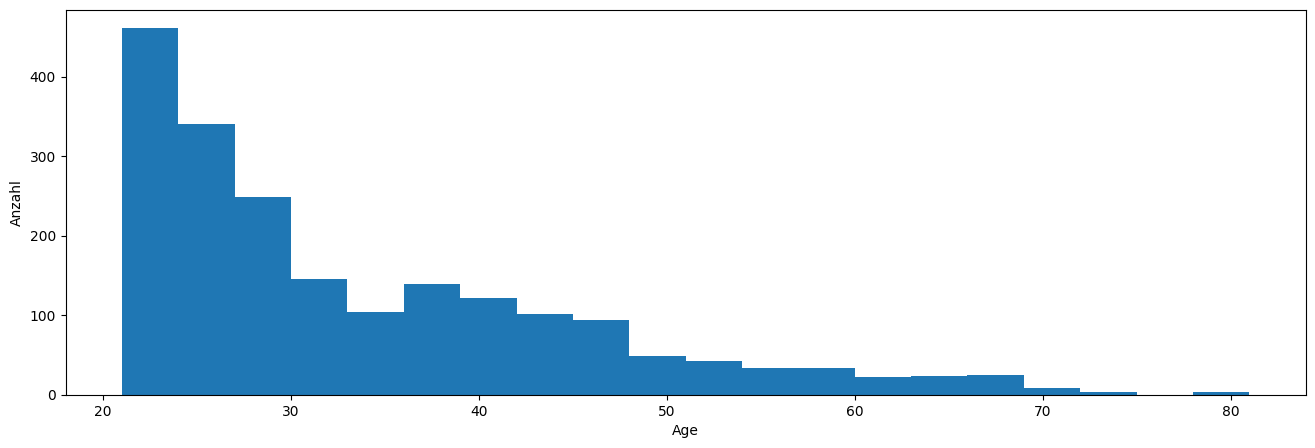

In [ ]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(5)
plt.hist(df['Age'], histtype = 'bar', bins = 20)
plt.xlabel('Age')
plt.ylabel('Anzahl')
plt.show()

              Age   Outcome
Age      1.000000  0.236509
Outcome  0.236509  1.000000



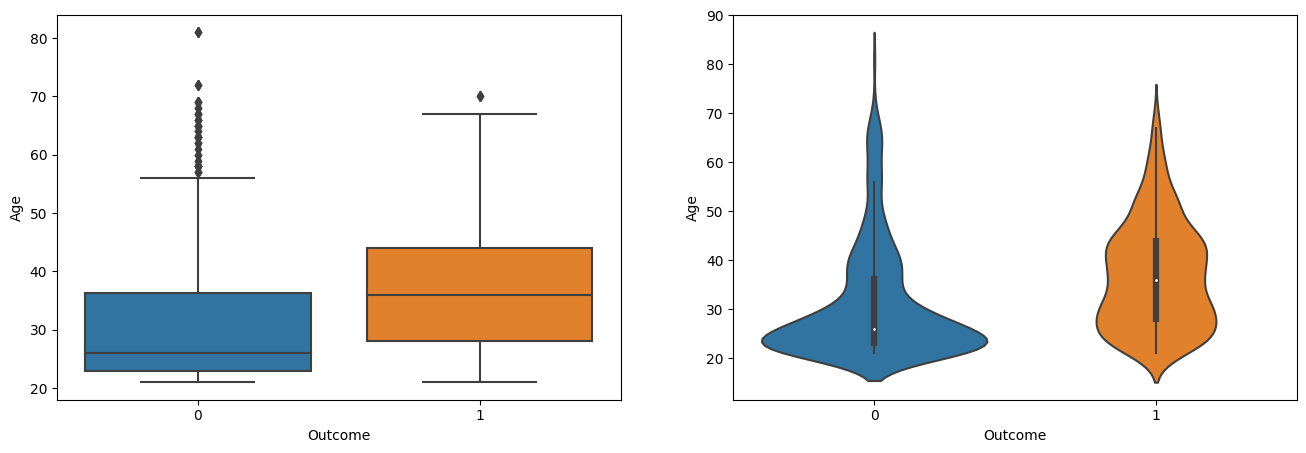

Median negativ :
26.0
Median positiv :
<bound method NDFrame._add_numeric_operations.<locals>.median of 0       47
2       31
3       24
11      45
16      55
        ..
1986    41
1991    36
1992    29
1996    36
1998    26
Name: Age, Length: 684, dtype: int64>


In [ ]:
age_to_out = df[['Age','Outcome']]
print(age_to_out.corr())
print('')

fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=False, sharex=False)
sns.boxplot(x = df['Outcome'], y = df['Age'], ax = axes[0])
sns.violinplot(x = df['Outcome'], y = df['Age'], ax = axes[1])
plt.show()
print('Median negativ :')
print(df_false.Age.median())
print('Median positiv :')
print(df_true.Age.median)

<Axes: xlabel='Age', ylabel='Outcome'>

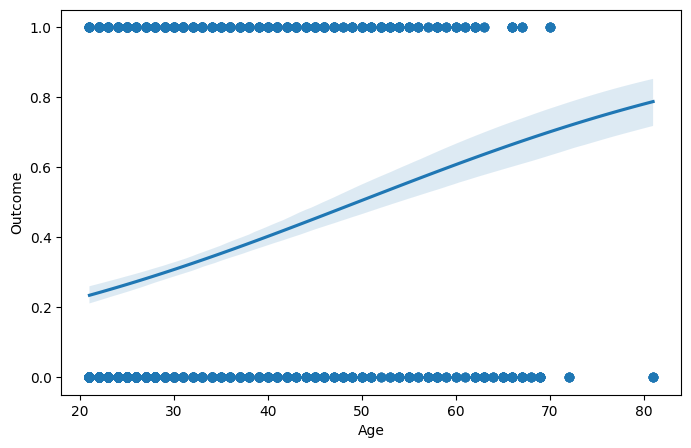

In [ ]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(age_to_out['Age'], age_to_out['Outcome'])
sns.regplot(data = df, x = df['Age'], y = df['Outcome'], logistic = True)

<Axes: >

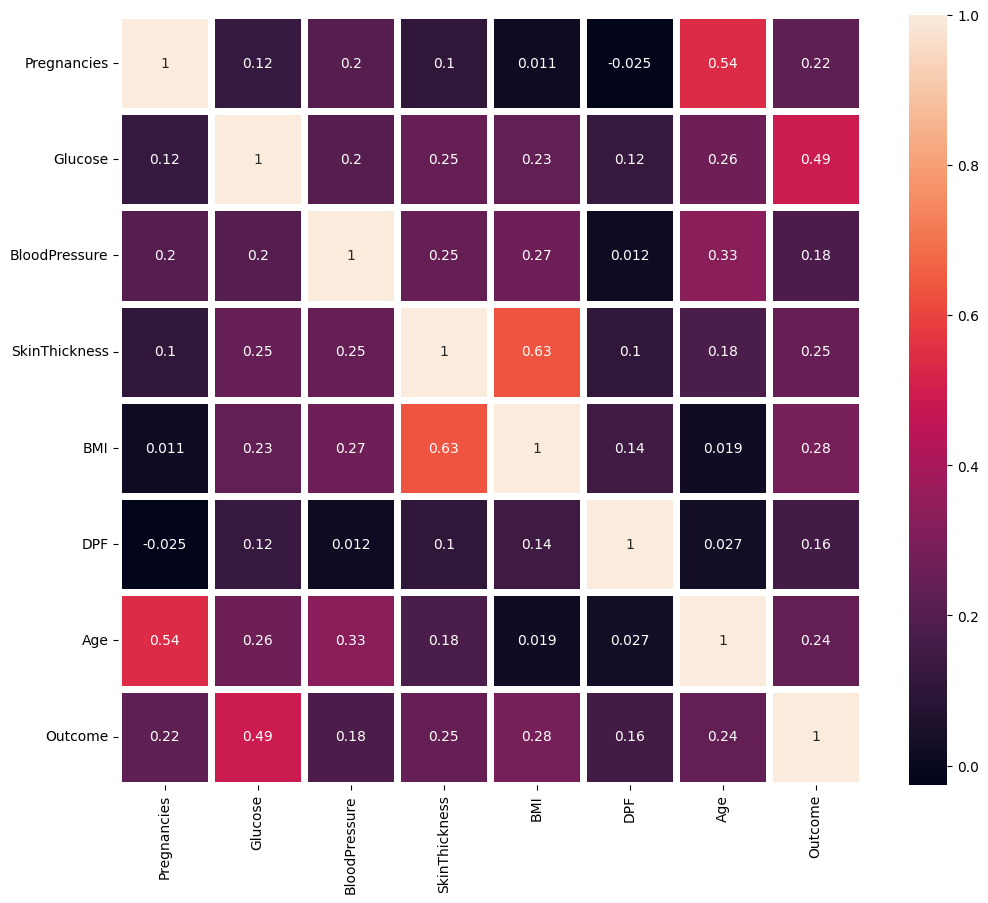

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12, 10), sharey=False, sharex=False)
sns.heatmap(df.corr(), annot= True, linewidth = 5)

<Axes: xlabel='Glucose', ylabel='Outcome'>

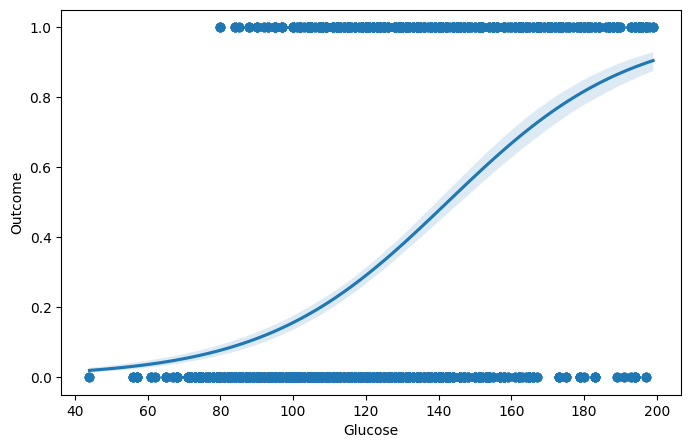

In [ ]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(df['Glucose'], df['Outcome'])
sns.regplot(data = df, x = df['Glucose'], y = df['Outcome'], logistic = True)

In [ ]:
df.fillna(df.median(), inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.94300,30.535733,44.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,72.38550,11.949824,24.000,64.000,72.000,80.000,122.00
SkinThickness,2000.0,29.24350,9.124957,7.000,25.000,29.000,32.000,110.00
BMI,2000.0,32.64660,7.190196,18.200,27.600,32.400,36.800,80.60
DPF,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [ ]:
inp = df[["Pregnancies","BloodPressure","SkinThickness","BMI","DPF","Age"]]
out = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(inp,out,test_size=0.2)

In [ ]:
results = []
recallresults = []
for k in range (1, 100, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    tp = sum(prediction[y_test==1]==1)
    fn = sum(prediction[y_test==1]==0)
    accuracy = sum(prediction==y_test)/len(y_test)
    recall =  tp/(tp+fn)
    print("k:",k,"Accuracy:",accuracy, "// Recall: ", recall)
    results.append([k,accuracy])
    recallresults.append([k,recall])

k: 1 Accuracy: 0.9675 // Recall:  0.9856115107913669
k: 3 Accuracy: 0.8375 // Recall:  0.7194244604316546
k: 5 Accuracy: 0.715 // Recall:  0.5467625899280576
k: 7 Accuracy: 0.705 // Recall:  0.5899280575539568
k: 9 Accuracy: 0.705 // Recall:  0.5755395683453237
k: 11 Accuracy: 0.6925 // Recall:  0.5035971223021583
k: 13 Accuracy: 0.685 // Recall:  0.4676258992805755
k: 15 Accuracy: 0.7025 // Recall:  0.4892086330935252
k: 17 Accuracy: 0.7225 // Recall:  0.4892086330935252
k: 19 Accuracy: 0.7175 // Recall:  0.4460431654676259
k: 21 Accuracy: 0.71 // Recall:  0.4676258992805755
k: 23 Accuracy: 0.6875 // Recall:  0.4028776978417266
k: 25 Accuracy: 0.6575 // Recall:  0.35251798561151076
k: 27 Accuracy: 0.665 // Recall:  0.381294964028777
k: 29 Accuracy: 0.665 // Recall:  0.39568345323741005
k: 31 Accuracy: 0.6725 // Recall:  0.381294964028777
k: 33 Accuracy: 0.685 // Recall:  0.38848920863309355
k: 35 Accuracy: 0.69 // Recall:  0.39568345323741005
k: 37 Accuracy: 0.685 // Recall:  0.374100

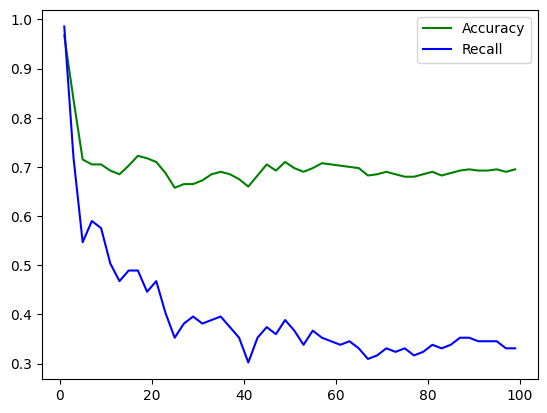

In [ ]:
results = pd.DataFrame(results, columns=["k","accuracy"])
resultsrecall = pd.DataFrame(recallresults, columns=['k','recall'])
plt.figure()
plt.plot(results.k, results.accuracy, "green", label= 'Accuracy')
plt.plot(resultsrecall.k, resultsrecall.recall, 'blue', label= 'Recall')
plt.legend(loc='upper right')
plt.show()

In [ ]:
k = 3
print("k =",k)
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(x_train,y_train)
prediction = classifier.predict(x_test)

cm = confusion_matrix(y_test, prediction)
print(cm)

tp = sum(prediction[y_test==1]==1)
fn = sum(prediction[y_test==1]==0)
tn = sum(prediction[y_test==0]==0)
fp = sum(prediction[y_test==0]==1)
print("TN: ",tn,"  FP:",fp,"  FN:",fn,"  TP:",tp )

accuracy = (tp+tn)/len(y_test)
print("Accuracy:", accuracy)
recall = tp/(tp+fn)
print("Recall:", recall)

k = 3
[[235  26]
 [ 39 100]]
TN:  235   FP: 26   FN: 39   TP: 100
Accuracy: 0.8375
Recall: 0.7194244604316546


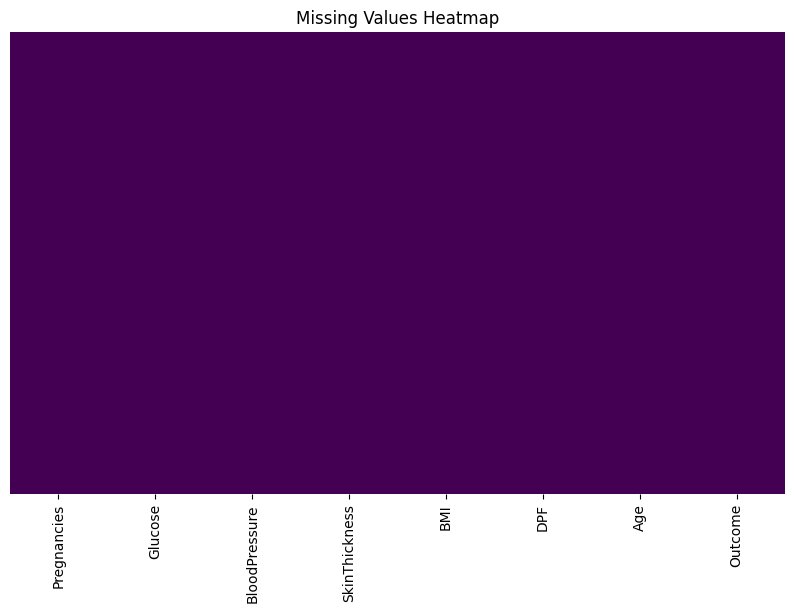

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

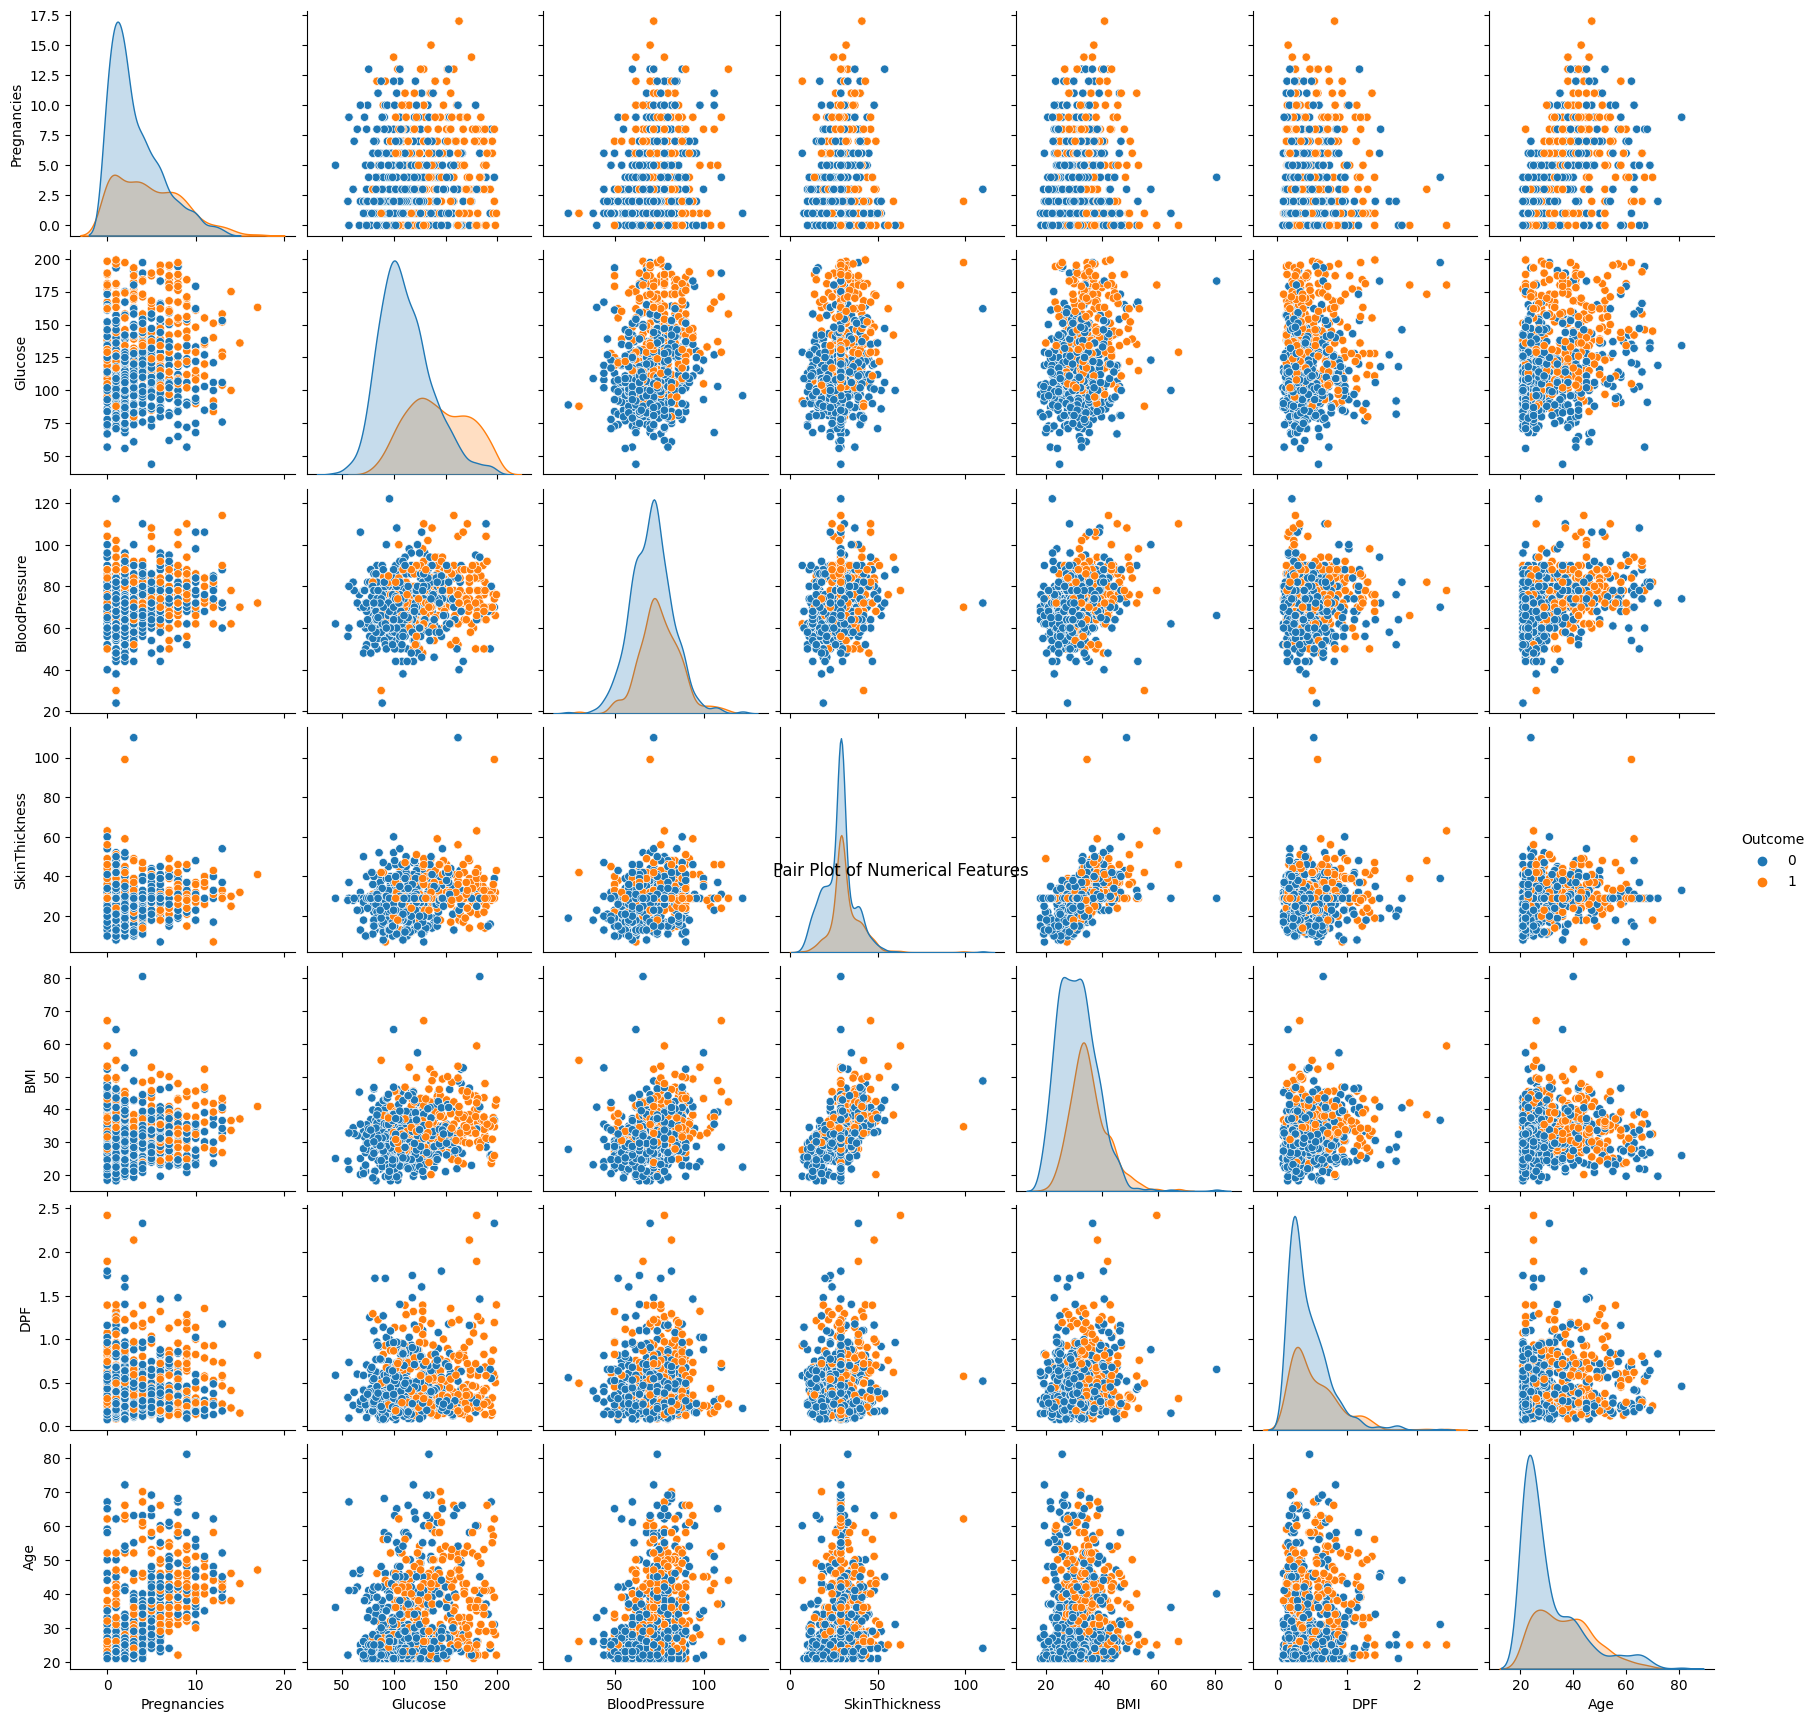

In [ ]:
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

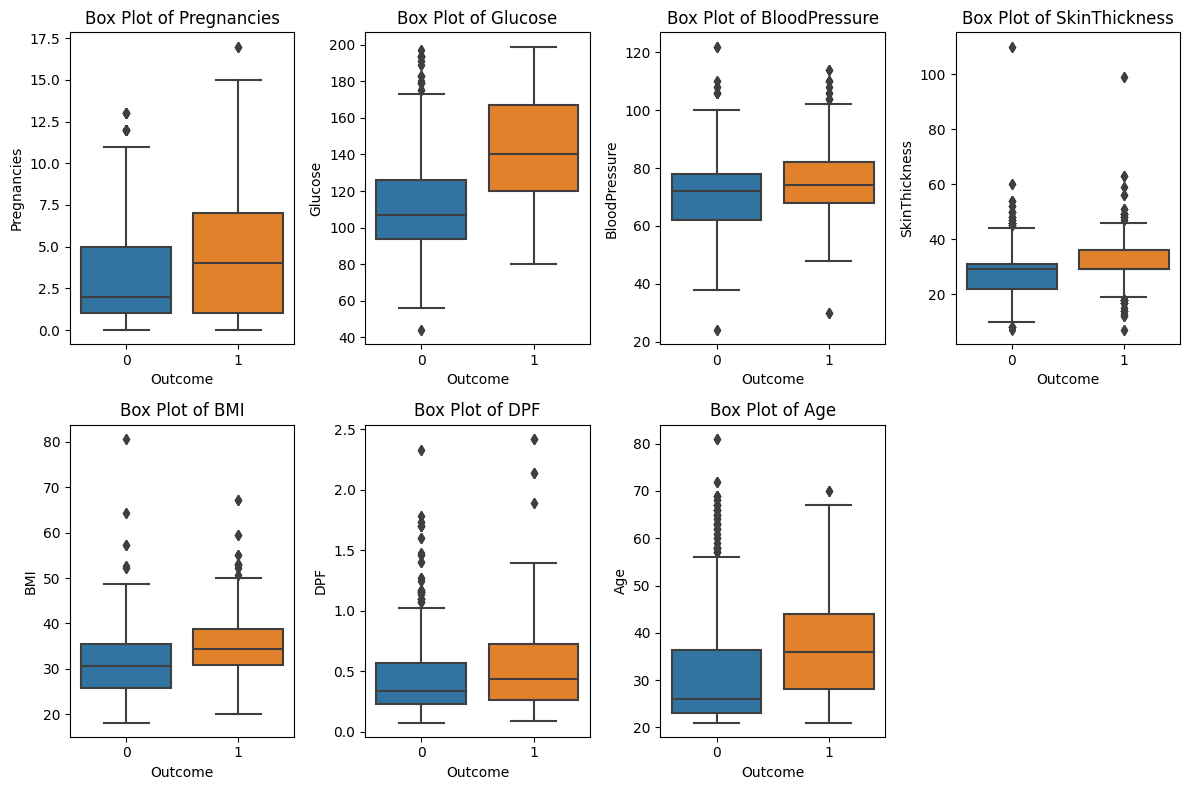

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()